In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import tree
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
DATA_DIR = "/kaggle/input/starbucks-customer-retention-malaysia-survey/Starbucks satisfactory survey encode cleaned.csv"

In [16]:
df = pd.read_csv(DATA_DIR, index_col='Id')
df.head()

,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,itemPurchaseCoffee,...,chooseRate,promoMethodApp,promoMethodSoc,promoMethodEmail,promoMethodDeal,promoMethodFriend,promoMethodDisplay,promoMethodBillboard,promoMethodOthers,loyal
Id,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,3,0,1,0,0,1,...,3,1,1,1,1,1,1,1,1,0
2,1,1,0,0,3,2,0,1,0,1,...,2,1,1,1,1,1,1,1,1,0
3,0,1,2,0,2,0,1,2,0,1,...,3,1,1,1,1,1,1,1,1,0
4,1,1,0,0,3,2,0,2,1,1,...,3,1,1,1,1,1,1,1,1,1
5,0,1,0,0,2,2,1,1,1,1,...,3,1,1,1,1,1,1,1,1,0


In [17]:
X = df.drop(['loyal'], axis=1)
y = df['loyal']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [19]:
dt_clf = tree.DecisionTreeClassifier(random_state=1234)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1234)

In [20]:
dt_clf.score(X_test, y_test)

0.75

[Text(0.5625, 0.9285714285714286, 'X[17] <= 2.5\ngini = 0.329\nsamples = 101\nvalue = [80, 21]'),
 Text(0.3333333333333333, 0.7857142857142857, 'X[8] <= 0.5\ngini = 0.496\nsamples = 33\nvalue = [15, 18]'),
 Text(0.16666666666666666, 0.6428571428571429, 'X[0] <= 0.5\ngini = 0.43\nsamples = 16\nvalue = [11, 5]'),
 Text(0.08333333333333333, 0.5, 'X[3] <= 2.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.041666666666666664, 0.35714285714285715, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.125, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.5, 'X[7] <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.20833333333333334, 0.35714285714285715, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.2916666666666667, 0.35714285714285715, 'X[4] <= 2.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nv

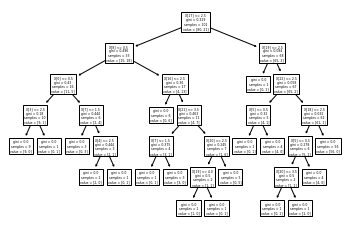

In [21]:
tree.plot_tree(dt_clf)

In [24]:
dot_data = tree.export_graphviz(dt_clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

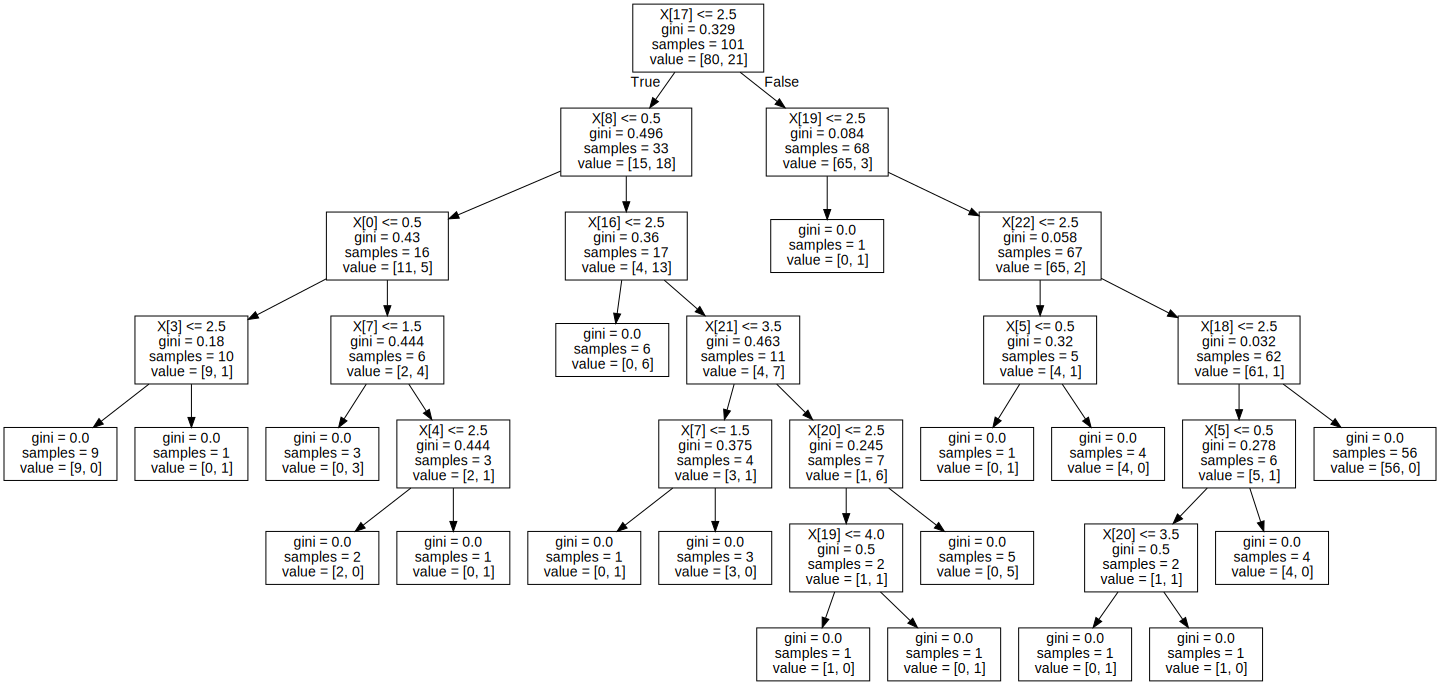

In [25]:
graph